In [71]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


In [72]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [73]:
len(X_train)

60000

In [74]:
len(X_test)

10000

In [75]:
X_train[0].shape

(28, 28)

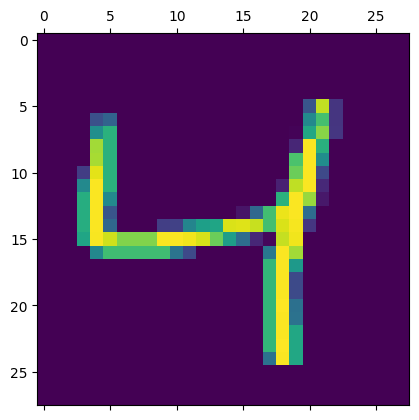

In [76]:
plt.matshow(X_train[2])

In [77]:
X_train.shape

(60000, 28, 28)

In [78]:
X_train=X_train/255
X_test=X_test/255

In [79]:
X_trained_flattened=X_train.reshape(len(X_train),28*28)
X_trained_flattened.shape

(60000, 784)

In [80]:
X_test_flattened=X_test.reshape(len(X_test),28*28)
X_test_flattened.shape

(10000, 784)

In [81]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_trained_flattened, y_train, epochs=100)


C:\Users\SUARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - accuracy: 0.8156 - loss: 0.7175
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.9134 - loss: 0.3110
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 697us/step - accuracy: 0.9194 - loss: 0.2830
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - accuracy: 0.9221 - loss: 0.2784
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - accuracy: 0.9293 - loss: 0.2608
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step - accuracy: 0.9270 - loss: 0.2583
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.9313 - loss: 0.2515
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 583us/step - accuracy: 0.9295 - loss: 0.2527
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - accuracy: 0.9311 - loss: 0.2459
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.9314 - loss: 0.2511
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 665us/step - accuracy: 0.9328 - loss: 0.24

In [82]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 878us/step - accuracy: 0.9176 - loss: 0.3324


[0.2978671193122864, 0.9261999726295471]

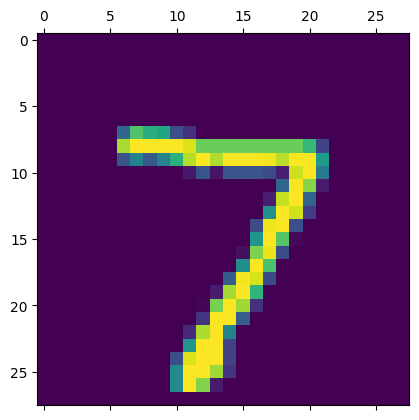

In [83]:
plt.matshow(X_test[0])

In [84]:
y_predict=model.predict(X_test_flattened)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step


array([8.2843099e-10, 4.4144634e-15, 4.9863132e-08, 9.0361470e-01,
       6.5471446e-05, 2.9368892e-02, 7.9050369e-17, 9.9979800e-01,
       1.5312479e-02, 3.0939704e-01], dtype=float32)

In [85]:
np.argmax(y_predict[0])

7

In [86]:
y_predicted_labels=[np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [87]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [88]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 954,    0,    1,    2,    1,    9,    8,    3,    2,    0],
       [   0, 1109,    7,    1,    0,    2,    3,    2,   11,    0],
       [   6,    8,  918,   18,   10,    4,   13,    9,   43,    3],
       [   4,    1,   18,  918,    3,   21,    2,   11,   27,    5],
       [   1,    4,    8,    1,  914,    0,    9,    9,    6,   30],
       [   8,    3,    3,   34,    9,  777,   14,    8,   32,    4],
       [   9,    3,    7,    2,    5,   11,  918,    1,    2,    0],
       [   2,    8,   19,    4,    4,    1,    0,  958,    2,   30],
       [   8,    9,    3,   18,    7,   22,   10,   11,  874,   12],
       [   7,    7,    1,   10,   20,    7,    0,   25,   10,  922]])>

Text(95.72222222222221, 0.5, 'Truth')

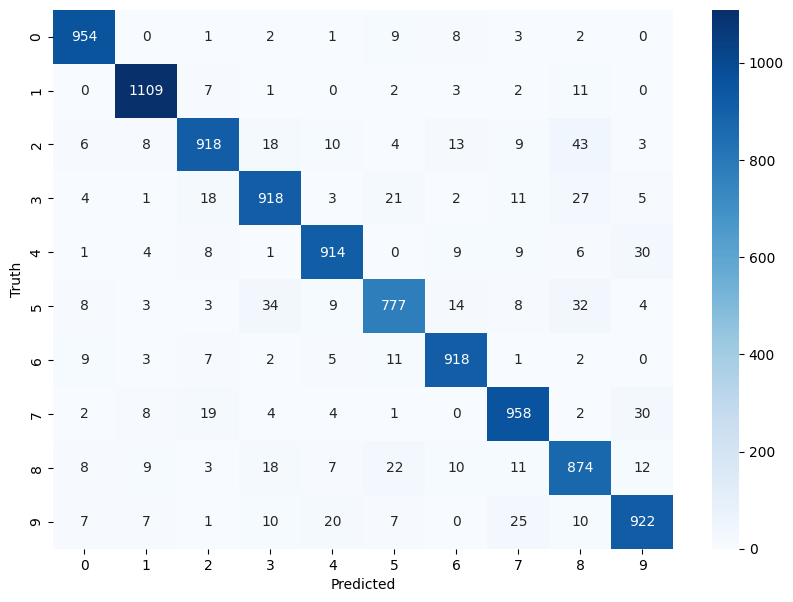

In [89]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True ,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [90]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential([
    Dense(100, input_shape=(784,), activation='relu'),
    Dense(10, activation='sigmoid')
    
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(X_trained_flattened, y_train, epochs=100)

C:\Users\SUARI\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8712 - loss: 0.4589
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9610 - loss: 0.1319
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9744 - loss: 0.0898
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9797 - loss: 0.0676
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9846 - loss: 0.0509
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9881 - loss: 0.0404
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9900 - loss: 0.0323
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9925 - loss: 0.0257
Epoch 9/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9936 - loss: 0.0226
Epoch 10/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9939 - loss: 0.0189
Epoch 11/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9957 - loss: 0.0150
Epoch 12/100
1875/1

Text(95.72222222222221, 0.5, 'Truth')

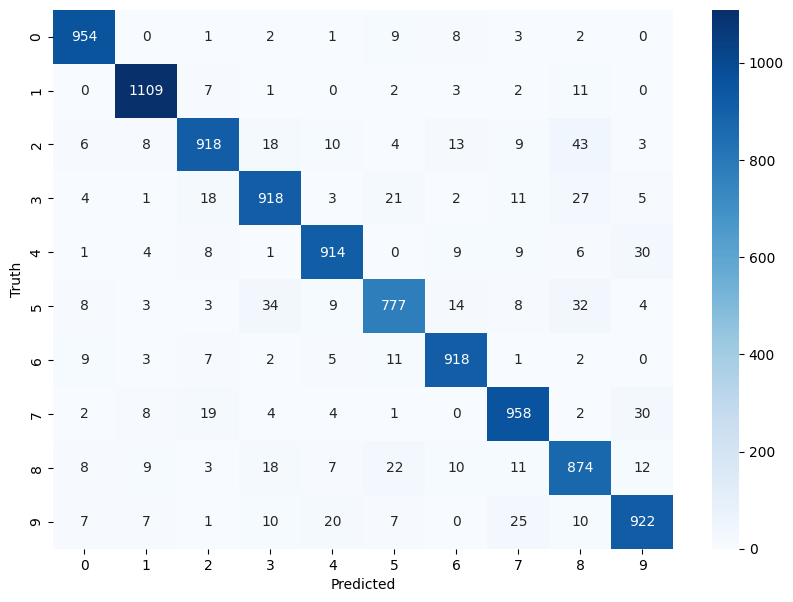

In [91]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True ,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
model.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.9718 - loss: 0.3158


[0.26081106066703796, 0.975600004196167]

In [96]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

# Define and compile your model
model = Sequential([
    Dense(100, input_shape=(784,), activation='relu'),
    Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Assuming X_trained_flattened and y_train are defined and ready for training
model.fit(X_trained_flattened, y_train, epochs=10)

# Save the model using TensorFlow's built-in method
model.save('model.h5')


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8736 - loss: 0.4467
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9616 - loss: 0.1352
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9736 - loss: 0.0886
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9806 - loss: 0.0651
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9858 - loss: 0.0480
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9878 - loss: 0.0407
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9902 - loss: 0.0340
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9919 - loss: 0.0258
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9942 - loss: 0.0204
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9946 - loss: 0.0178


In [97]:
# Load the saved model
loaded_model = tf.keras.models.load_model('model.h5')

# Now you can use loaded_model for inference or further training
